In [ ]:
!pip install pytorch_lightning --upgrade

In [1]:
# import os
from shutil import copyfile
dp = 'asdasd'
# copyfile(src=f'../input/{dp}/getlr.py', dst='../working/getlr.py')
# copyfile(src=f'../input/{dp}/learning_rates.txt', dst='../working/learning_rates.txt')
# copyfile(src=f'../input/{dp}/config.py', dst='../working/config.py')
# copyfile(src=f'../input/{dp}/dataset.py', dst='../working/dataset.py')
# copyfile(src=f'../input/{dp}/loss.py', dst='../working/loss.py')
copyfile(src=f'../input/{dp}/model.py', dst='../working/model.py')
# copyfile(src=f'../input/{dp}/train.py', dst='../working/train.py')
# copyfile(src=f'../input/{dp}/utils.py', dst='../working/utils.py')

'../working/model.py'

In [2]:
# imports
import os

import torch
from pytorch_lightning import LightningModule, Trainer
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, random_split
from torchmetrics import Accuracy
from torchvision import transforms

import config
import torch.optim as optim

from model import YOLOv3
from tqdm import tqdm
from utils import (
    mean_average_precision,
    cells_to_bboxes,
    get_evaluation_bboxes,
    save_checkpoint,
    load_checkpoint,
    check_class_accuracy,
    get_loaders,
    plot_couple_examples
)
from loss import YoloLoss
from pytorch_lightning.callbacks import ModelSummary
from pytorch_lightning import LightningModule, Trainer
import warnings
warnings.filterwarnings("ignore")

torch.backends.cudnn.benchmark = True

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
from pytorch_lightning.callbacks import ModelSummary


yolo_model = YOLOv3(num_classes=config.NUM_CLASSES).to(config.DEVICE)
# yolo_model.load_from_checkpoint(checkpoint_path="twentyepoch.ckpt")
# yolo_model = YOLOv3(num_classes=config.NUM_CLASSES)
# init Dataloader from MNIST Dataloader
# train_ds = CIFAR10(PATH_DATASETS, train=True, download=True, transform= transforms.ToTensor())
# train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE)
# yolo_model.epoch=20
# initialize the trainer
trainer = Trainer(
    callbacks=[ModelSummary(max_depth=-1)],
    precision = 16,
    devices=1,
    accelerator="gpu",
    max_epochs = 40
)
# trainer=Trainer(resume_from_checkpoint="twentyepoch.ckpt")



Training: 0it [00:00, ?it/s]

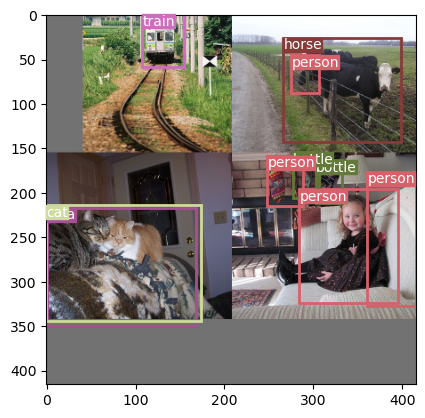

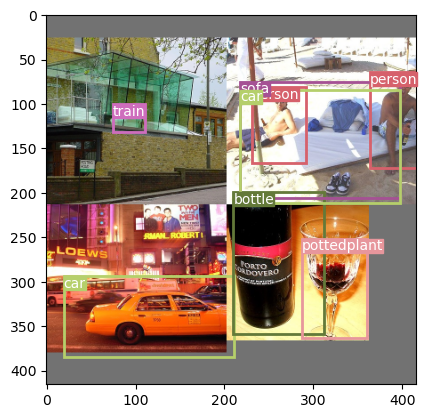

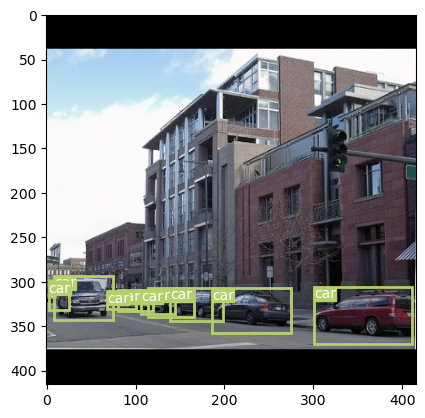

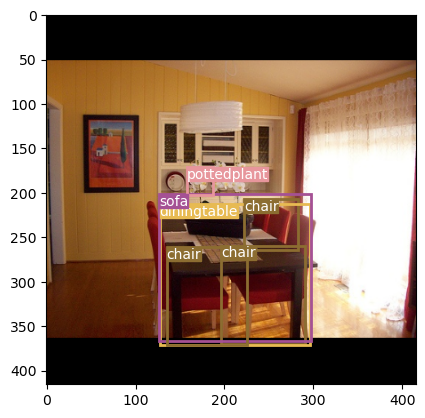

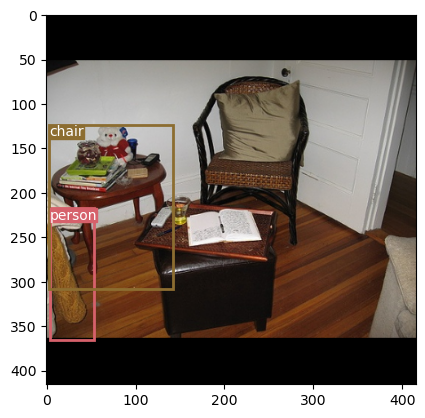

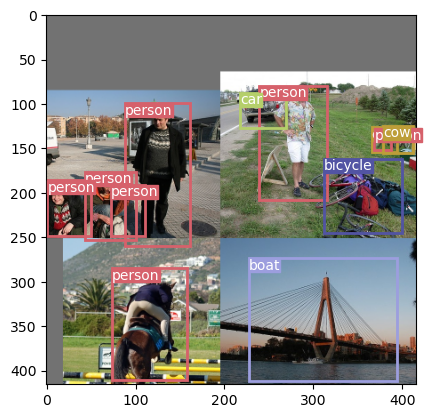

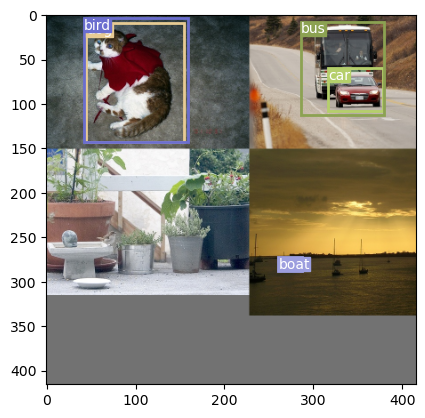

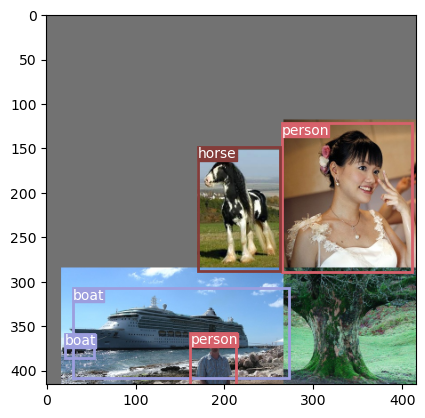

lr:  4.046916155755981e-09
loss: 5.557499767730595
Currently epoch 1


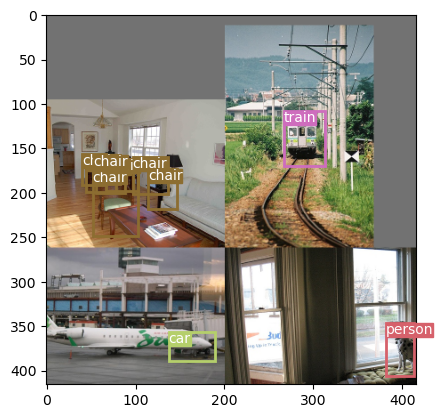

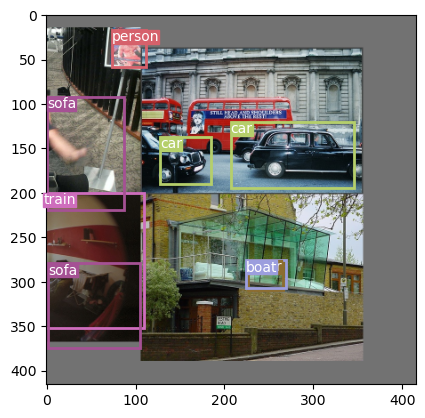

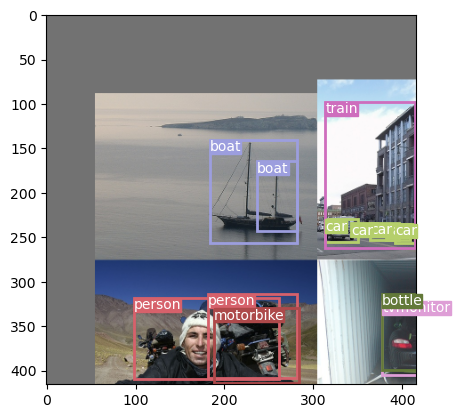

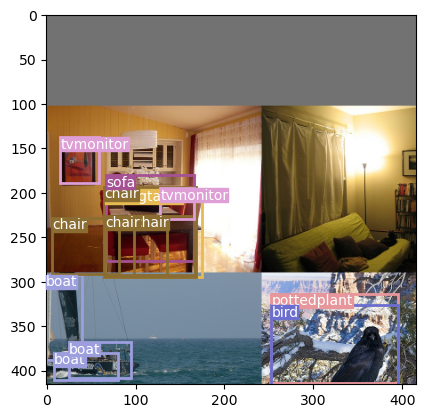

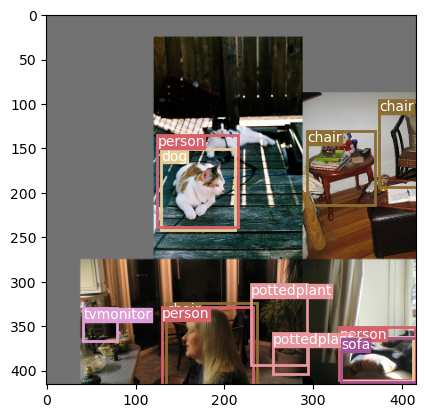

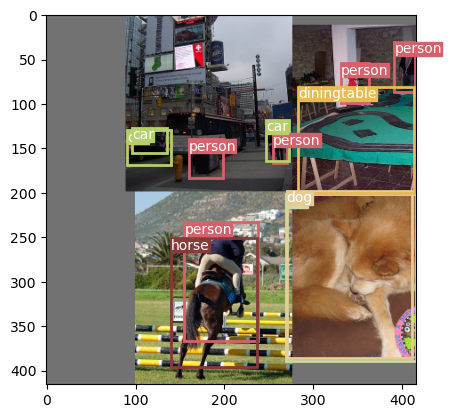

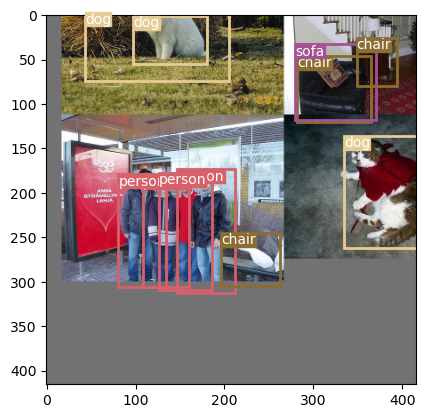

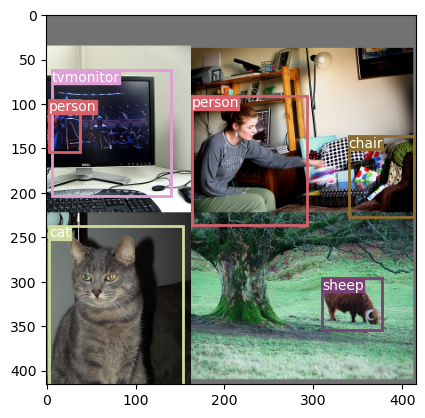

lr:  4.046916155755981e-09
loss: 5.5730722484441335
Currently epoch 2


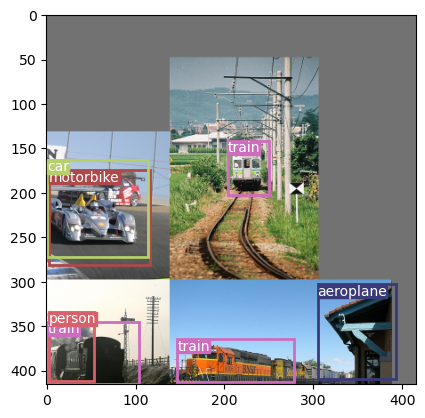

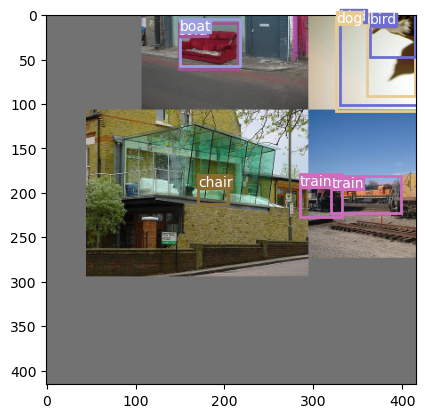

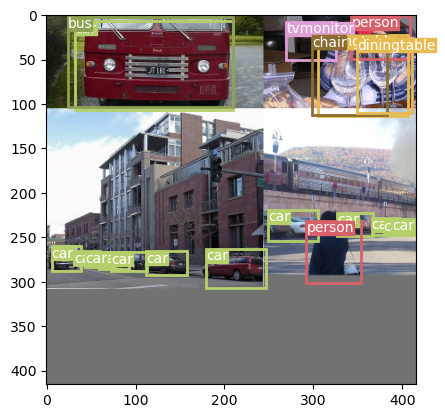

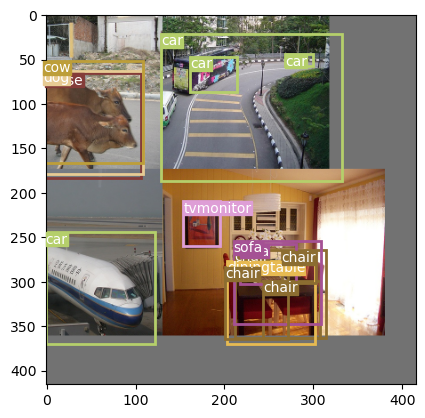

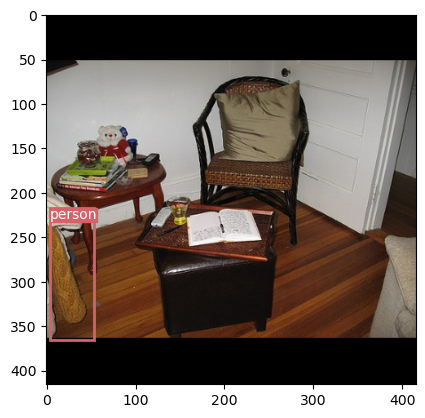

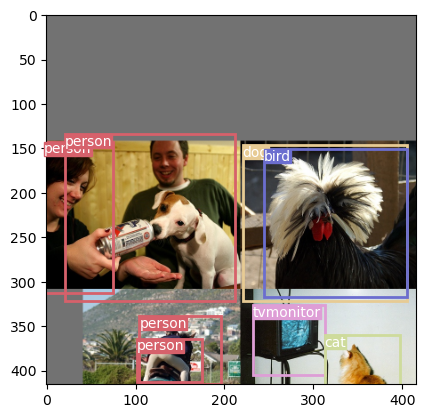

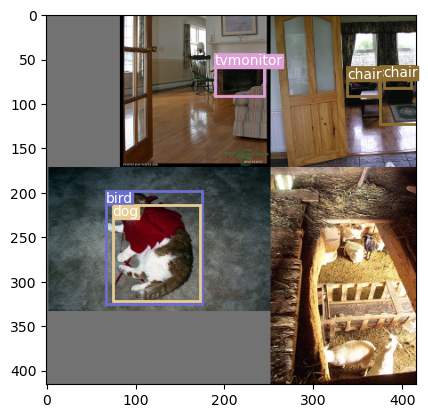

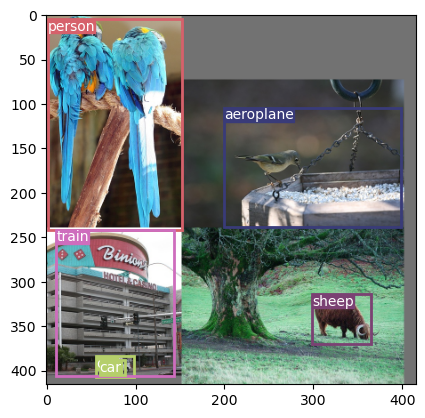

lr:  4.046916155755981e-09
loss: 5.528018645798378
Currently epoch 3
On Train loader:



100%|██████████| 518/518 [09:20<00:00,  1.08s/it]


Class accuracy is: 73.040520%
No obj accuracy is: 97.752090%
Obj accuracy is: 69.856880%


In [ ]:
# Train the model
trainer.fit(yolo_model,ckpt_path='twentyepoch.ckpt')

In [ ]:
trainer.save_checkpoint("twentyepoch.ckpt")